In [11]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

plt.style.use('seaborn-darkgrid')

# Analyse SPHERE data
Analyse data and make plots for in/out house data

In [12]:
# load data
df = pd.read_csv('tmp.csv')
df['datetime'] = pd.to_datetime(df['datetime'], infer_datetime_format=True)
df.set_index('datetime', inplace=True)

### Plot home/away flag plots with 1 day / 7 days moving averages

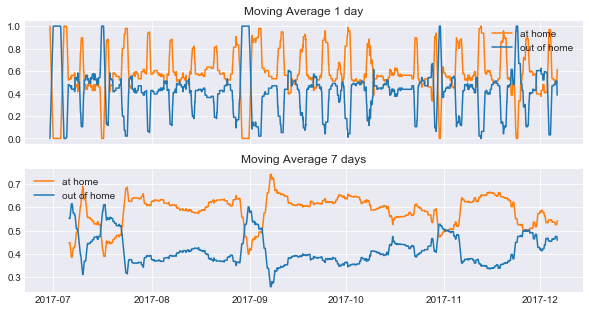

In [49]:
# make plots
fig, ax = plt.subplots(2,1, figsize=(10,5), sharex=True)
ax[0].plot(df.index, df['ins_ma_1d'], 'C1', label='at home')
ax[0].plot(df.index, df['out_ma_1d'], 'C0', label='out of home')
ax[0].legend()
ax[0].set_title('Moving Average 1 day')
ax[1].plot(df.index, df['ins_ma_7d'], 'C1', label='at home')
ax[1].plot(df.index, df['out_ma_7d'], 'C0', label='out of home')
ax[1].legend()
ax[1].set_title('Moving Average 7 days');


### Weekly Circular Plots home/away flag

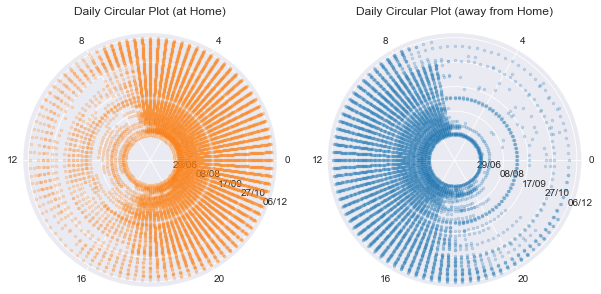

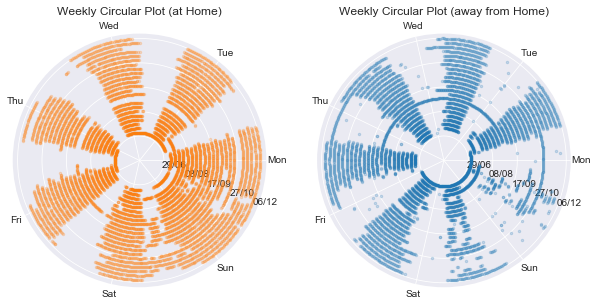

In [81]:
# make index Monday=0, to Sunday=6 with fine resolutions
day_of_week = df.index.dayofweek
hour_of_day = df.index.hour + df.index.minute / 60

day_of_week = day_of_week + hour_of_day / 24.0
day_of_week_label = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']

# # make plots
# fig, ax = plt.subplots(1,2,subplot_kw={'projection': 'polar'}, figsize=(10, 24))
# ax[0].plot(day_of_week * 2*np.pi / 7.0, df['ins_ma_1d'], 'C1', alpha=0.5)
# ax[0].set_rticks([0.25, 0.5, 0.75, 1.0])  # Less radial ticks
# ax[0].set_rlabel_position(-22.5)  # Move radial labels away from plotted line
# ax[0].set_xticks((np.arange(7)+1.0) / 7.0 * 2*np.pi)
# ax[0].set_xticklabels(day_of_week_label)
# ax[0].set_title('Rate of Stay at Home in a day window')
# ax[1].plot(day_of_week * 2*np.pi / 7.0, df['out_ma_1d'], 'C0', alpha=0.5)
# ax[1].set_rticks([0.25, 0.5, 0.75, 1.0])  # Less radial ticks
# ax[1].set_rlabel_position(-22.5)  # Move radial labels away from plotted line
# ax[1].set_xticks((np.arange(7)+1.0) / 7.0 * 2*np.pi)
# ax[1].set_xticklabels(day_of_week_label)
# ax[1].set_title('Rate of Out of Home in a day window');

ins = df['ins'].to_numpy()
ins_flag = ins == 1
out_flag = ins == 0
r_vals = np.arange(len(ins)) / len(ins) + 0.25

# generate r-label
day = df.index.day[np.linspace(0,len(ins)-1,5).astype(int)]
mon = df.index.month[np.linspace(0,len(ins)-1,5).astype(int)]
r_label = []
for m, d in zip(mon, day):
    r_label.append(f'{d:02}/{m:02}')

# make plots
fig, ax = plt.subplots(1,2,subplot_kw={'projection': 'polar'}, figsize=(10, 24))
ax[0].plot(hour_of_day[ins_flag] * 2*np.pi / 24.0,
           r_vals[ins_flag],
           '.C1', markersize=5, alpha=0.2)
ax[0].set_yticks([0.25, 0.5, 0.75, 1.0, 1.25])  # Less radial ticks
ax[0].set_yticklabels(r_label)
ax[0].set_rlabel_position(-22.5)  # Move radial labels away from plotted line
ax[0].set_xticks(np.arange(0,24,4) / 24.0 * 2*np.pi)
ax[0].set_xticklabels(np.arange(0,24,4))
ax[0].set_title('Daily Circular Plot (at Home)')
ax[1].plot(hour_of_day[out_flag] * 2*np.pi / 24.0,
           r_vals[out_flag],
           '.C0', markersize=5, alpha=0.2)
ax[1].set_yticks([0.25, 0.5, 0.75, 1.0, 1.25]) # Less radial ticks
ax[1].set_yticklabels(r_label)
ax[1].set_rlabel_position(-22.5)  # Move radial labels away from plotted line
ax[1].set_xticks(np.arange(0,24,4) / 24.0 * 2*np.pi)
ax[1].set_xticklabels(np.arange(0,24,4))
ax[1].set_title('Daily Circular Plot (away from Home)');


fig, ax = plt.subplots(1,2,subplot_kw={'projection': 'polar'}, figsize=(10, 24))
ax[0].plot(day_of_week[ins_flag] * 2*np.pi / 7.0,
           r_vals[ins_flag],
           '.C1', markersize=5, alpha=0.2)
ax[0].set_yticks([0.25, 0.5, 0.75, 1.0, 1.25])  # Less radial ticks
ax[0].set_yticklabels(r_label)
ax[0].set_rlabel_position(-22.5)
ax[0].set_xticks(np.arange(7) / 7.0 * 2*np.pi)
ax[0].set_xticklabels(day_of_week_label)
ax[0].set_title('Weekly Circular Plot (at Home)')

ax[1].plot(day_of_week[out_flag] * 2*np.pi / 7.0,
           r_vals[out_flag],
           '.C0', markersize=5, alpha=0.2)
ax[1].set_yticks([0.25, 0.5, 0.75, 1.0, 1.25])  # Less radial ticks
ax[1].set_yticklabels(r_label)
ax[1].set_rlabel_position(-22.5)
ax[1].set_xticks(np.arange(0,24,4) / 24.0 * 2*np.pi)
ax[1].set_xticklabels(np.arange(0,24,4))
ax[1].set_xticks(np.arange(7) / 7.0 * 2*np.pi)
ax[1].set_xticklabels(day_of_week_label)
ax[1].set_title('Weekly Circular Plot (away from Home)');

### Fourier analysis of "at home" flag
Plots Fourer analysis results for three different frequency ranges. Top figure shows overall frequency
range, 2nd plot shows 0 to 10 and 3rd plot shows 0 to 1 frequency range.

The plots should indicate a cycle pattern of the target person's behaviour.

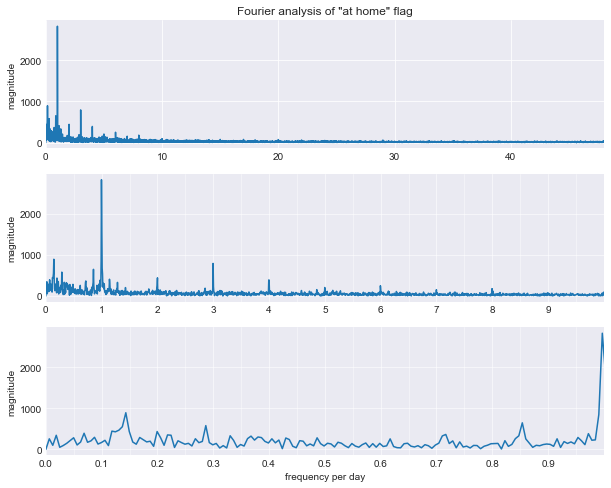

In [50]:
out = df['out'].to_numpy()
ins = df['ins'].to_numpy()
out_ma_1d = df['out_ma_1d']
ins_ma_1d = df['ins_ma_1d']

f_ins = np.fft.rfft(ins)
bins = np.arange(len(f_ins)) * 24.0*60.0/15.0/len(ins)
f_ins[0] = 0.0
fig, ax = plt.subplots(3,1, figsize=(10,8))
ax[0].plot(bins, np.abs(f_ins))
ax[0].set_xlim((0,bins[-1]))
ax[0].set_ylabel('magnitude')
ax[1].plot(bins, np.abs(f_ins))
ax[1].set_xlim((0,10))
ax[1].set_xticks(np.arange(10))
ax[1].set_xticks(np.arange(0,10,0.5), minor=True)
ax[1].grid(which='minor', alpha=0.5)
ax[1].grid(which='major', alpha=0.7)
ax[1].set_ylabel('magnitude')
ax[2].plot(bins, np.abs(f_ins))
ax[2].set_xlim((0,1))
ax[2].set_xticks(np.arange(0,1,0.1))
ax[2].set_xticks(np.arange(0,1,0.05), minor=True)
ax[2].grid(which='minor', alpha=0.5)
ax[2].grid(which='major', alpha=0.7)
ax[2].set_ylabel('magnitude')
ax[2].set_xlabel('frequency per day')
ax[0].set_title('Fourier analysis of \"at home\" flag');